##### 取log用意
##### 標準化使資料常態分佈是因為訓練模型的資料最好是常態分佈嘛？
##### 決策樹類的模型不用資料是常態分佈？
##### kmeans很在意離群值，要怎樣刪離群值？把最多的數量那群刪掉？
##### 自動排除離群值的套件？(LOF)
##### 決策數找出分群的標準線？

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 觀察資料

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/data/RFM.csv')
print(df.shape)
print(df['ProjType'].unique())
df.head()
# OD_cnt 消費次數
# freq 次數/14個月
# avg_price 訂單平均金額
# tot_price 消費總額
# days 上次消費幾天前

(708701, 7)
[0 3 4]


,IDNO,ProjType,OD_cnt,freq,avg_price,tot_price,days
0,O100597468,0,3,0.23,1279,3839,38
1,O100598090,3,2,0.15,715,1430,118
2,O100598705,4,41,3.15,20,857,14
3,O100602875,4,11,0.85,20,222,16
4,O100603336,0,1,0.08,176,176,398


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


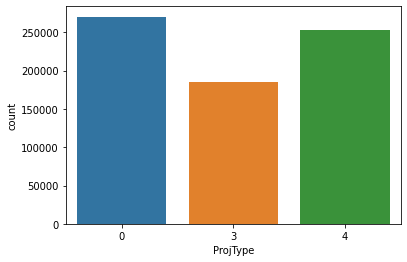

In [4]:
sns.countplot(df['ProjType'])

In [5]:
df=df[df['ProjType']==4]
print(df.shape)

(253227, 7)


In [6]:
df.describe()

,ProjType,OD_cnt,freq,avg_price,tot_price,days
count,253227.0,253227.000000,253227.000000,253227.000000,253227.000000,253227.000000
mean,4.0,11.743195,0.903446,48.502719,352.025076,136.949622
std,0.0,37.591925,2.891635,143.806546,937.957605,126.881546
min,4.0,1.000000,0.080000,0.000000,0.000000,0.000000
25%,4.0,2.000000,0.150000,15.000000,40.000000,31.000000
50%,4.0,4.000000,0.310000,28.000000,111.000000,91.000000
75%,4.0,9.000000,0.690000,46.000000,308.000000,219.000000
max,4.0,4095.000000,315.000000,14189.000000,127701.000000,423.000000


In [7]:
df['OD_cnt'].value_counts(ascending=True)

# 值出現的比率
# df['OD_cnt'].value_counts(normalize=True,ascending=True)

603        1
472        1
435        1
667        1
855        1
       ...  
5      13856
4      17946
3      24731
2      37145
1      62461
Name: OD_cnt, Length: 666, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


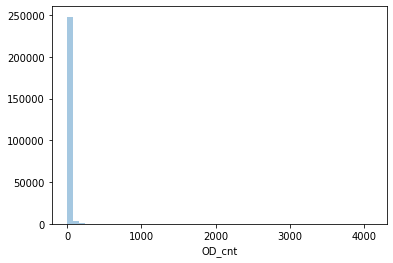

In [8]:
# 資料都集中100以下左右的區間
sns.distplot(df['OD_cnt'],kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


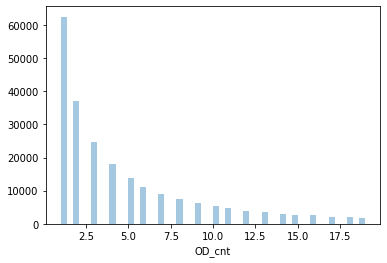

In [9]:
# 發現5次以下比率很多，是可能影響分群結果的離群值
sns.distplot(df['OD_cnt'][df['OD_cnt']<20],kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


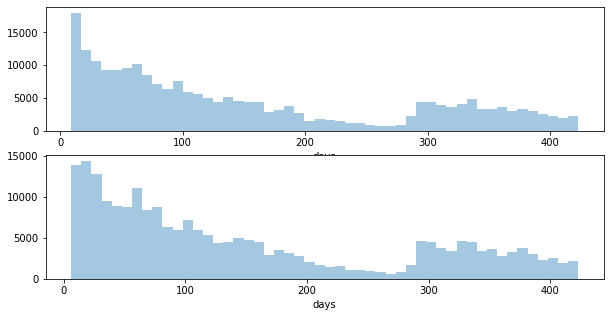

In [10]:
fig,axes=plt.subplots(2)
fig.set_size_inches(10,5)
sns.distplot(df['days'][df['days']>8],kde=False,ax=axes[0])
sns.distplot(df['days'][df['days']>5],kde=False,ax=axes[1])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


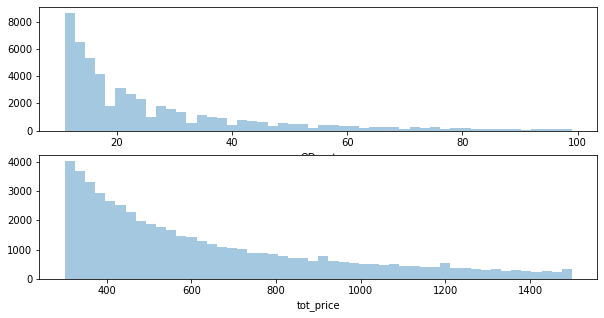

In [11]:
# 這樣應該OK吧
fig,axes=plt.subplots(2)
fig.set_size_inches(10,5)
sns.distplot(df['OD_cnt'][(df['OD_cnt']<100)&(df['OD_cnt']>10)],kde=False,ax=axes[0])
sns.distplot(df['tot_price'][(df['tot_price']<1500)&(df['tot_price']>300)],kde=False,ax=axes[1])

In [12]:
# percentile直接計算x%位置的數值，超方便
five_num = [50,60,70,98,99,99.9]
quantile_5s = [np.percentile(df['OD_cnt'], q = i) for i in five_num]
print(f"次數：{quantile_5s}")
quantile_5s = [np.percentile(df['OD_cnt'], q = i) for i in five_num]
print(f"頻率：{quantile_5s}")
quantile_5s = [np.percentile(df['tot_price'], q = i) for i in five_num]
print(f"消費：{quantile_5s}")
quantile_5s = [np.percentile(df['days'], q = i) for i in five_num]
print(f"天數：{quantile_5s}")

次數：[4.0, 5.0, 8.0, 85.0, 139.0, 492.548000000068]
頻率：[4.0, 5.0, 8.0, 85.0, 139.0, 492.548000000068]
消費：[111.0, 164.0, 247.0, 2654.0, 3996.4799999999814, 10740.932000000612]
天數：[91.0, 127.0, 176.0, 402.0, 413.0, 423.0]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


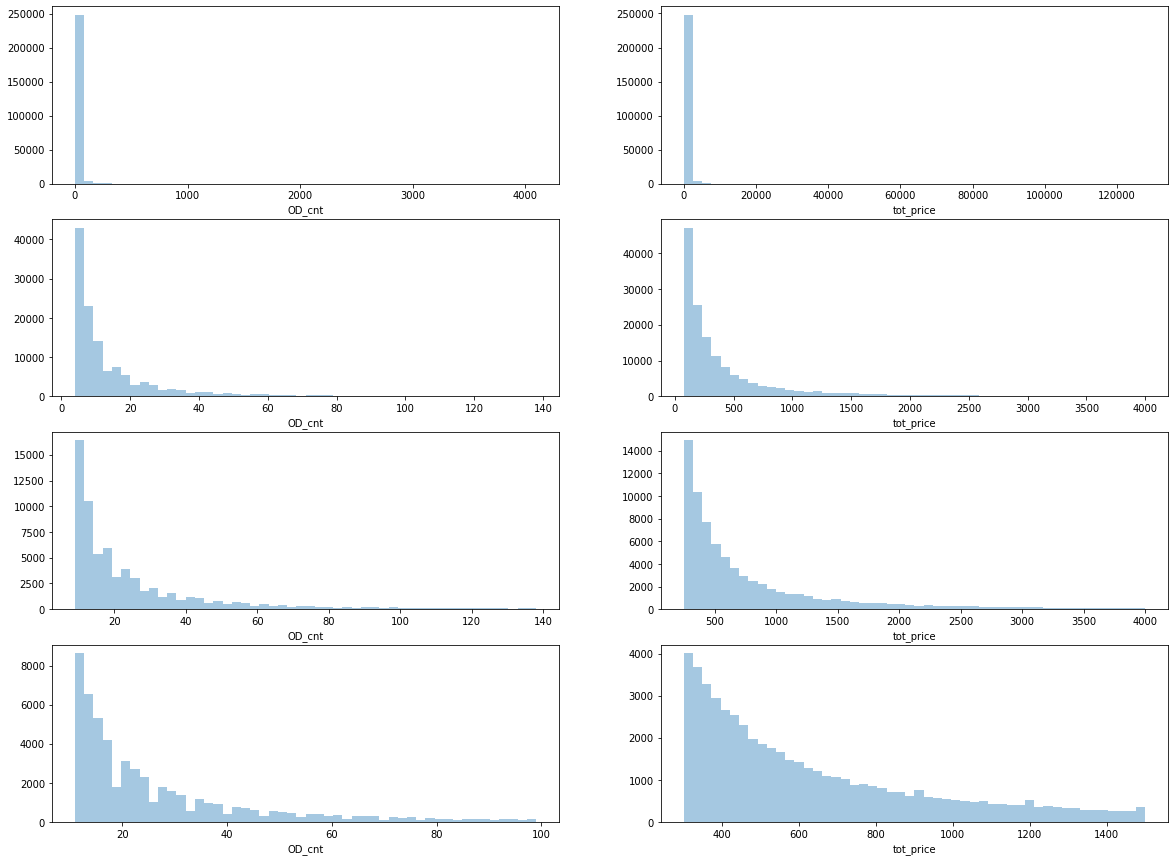

In [13]:
fig,axes=plt.subplots(4,2)
fig.set_size_inches(20,15)

sns.distplot(df['OD_cnt'],ax=axes[0,0],kde=False) #不加kde=False會畫一條均線，但y軸就不是顯示count了，變一個叫Density的
sns.distplot(df['tot_price'],ax=axes[0,1],kde=False)

sns.distplot(df['OD_cnt'][(df['OD_cnt']<139)&(df['OD_cnt']>3)],ax=axes[1,0],kde=False)
sns.distplot(df['tot_price'][(df['tot_price']<4000)&(df['tot_price']>75)],ax=axes[1,1],kde=False)

sns.distplot(df['OD_cnt'][(df['OD_cnt']<139)&(df['OD_cnt']>8)],ax=axes[2,0],kde=False)
sns.distplot(df['tot_price'][(df['tot_price']<4000)&(df['tot_price']>247)],ax=axes[2,1],kde=False)

sns.distplot(df['OD_cnt'][(df['OD_cnt']<100)&(df['OD_cnt']>10)],ax=axes[3,0],kde=False)
sns.distplot(df['tot_price'][(df['tot_price']<1500)&(df['tot_price']>300)],ax=axes[3,1],kde=False)

# 另種畫法
# df['freq'][(df['freq']<26.92) & (df['freq']>0.08)].hist()
# 另種畫法
# df['freq'][(df['freq']<26.92) & (df['freq']>0.08)].hist(bins = 100)
# plt.show()

# 處理離群值

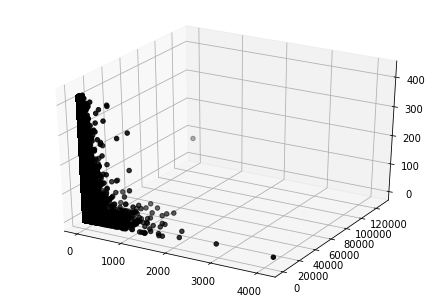

In [14]:
from sklearn import cluster, datasets
from mpl_toolkits.mplot3d.axes3d import Axes3D
X = df[['OD_cnt','tot_price','days']]
#繪製資料分佈圖

# 製作隨機50個點(x, y, z軸)範圍在1~50
x = X['OD_cnt']
y = X['tot_price']
z = X['days']

# 製作figure(單圖)
fig = plt.figure()
ax = Axes3D(fig)
# 設定ax為散佈圖(單圖)
ax.scatter(x, y, z, c ='black')
plt.show()

In [15]:
# 排除極端值，分位數99.8是26.92次，分位數22是0.8次，但用0.8去算還是會標準差大於平均數，我試到1.3才會平>標
# 可是我這樣只處理一個欄位，另2個欄位還是標>平.....
# 下個cell試著rawdata直接取最大最小和標準化試試

# df = df[(df['freq']<np.percentile(df['freq'], q = 95)) & (df['freq']>np.percentile(df['freq'], q = 20))]
# df = df[(df['tot_price']<np.percentile(df['tot_price'], q = 95)) & (df['tot_price']>np.percentile(df['tot_price'], q = 20))]
# df = df[(df['days']<np.percentile(df['days'], q = 95)) & (df['days']>np.percentile(df['days'], q = 20))]

df_KILLoutlier = df[(df['OD_cnt']<100)&(df['OD_cnt']>10)]
df_KILLoutlier = df_KILLoutlier[(df_KILLoutlier['tot_price']<2000)&(df_KILLoutlier['tot_price']>300)]
print(df_KILLoutlier.shape)

(35839, 7)


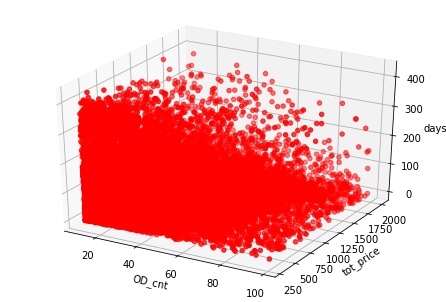

In [16]:
X = df_KILLoutlier[['OD_cnt','tot_price','days']]
#繪製資料分佈圖

# 製作隨機50個點(x, y, z軸)範圍在1~50
x = X['OD_cnt']
y = X['tot_price']
z = X['days']

# 製作figure(單圖)
fig = plt.figure()
ax = Axes3D(fig)
# 設定ax為散佈圖(單圖)
ax.scatter(x, y, z, c ='red')
ax.set_xlabel('OD_cnt')
ax.set_ylabel('tot_price')
ax.set_zlabel('days')
plt.show()

# 資料做標準化

In [17]:
import copy
# 無腦用深複製就對了，誰管你記憶體量，林北什麼沒有，記憶體最多
df_MinMax = copy.deepcopy(df)
df_Standard = copy.deepcopy(df)
df_KILLoutlier_MinMax = copy.deepcopy(df_KILLoutlier)
df_KILLoutlier_Standard = copy.deepcopy(df_KILLoutlier)

df_MinMax.reset_index(inplace=True,drop=True)
df_Standard.reset_index(inplace=True,drop=True)
df_KILLoutlier_MinMax.reset_index(inplace=True,drop=True)
df_KILLoutlier_Standard.reset_index(inplace=True,drop=True)

In [18]:
# 判断多个空值对象
# 這寫法才是找出null值，df_MinMax.isnull()是能看個屁
# isnull和isna是一樣的
df_MinMax[df_MinMax.isna().T.any()]

,IDNO,ProjType,OD_cnt,freq,avg_price,tot_price,days


In [19]:
# 判断单个空值对象
df_MinMax[df_MinMax['days'].isna()]

,IDNO,ProjType,OD_cnt,freq,avg_price,tot_price,days


In [20]:
df_MinMax[df_MinMax['freq']==None]

,IDNO,ProjType,OD_cnt,freq,avg_price,tot_price,days


In [21]:
df_MinMax[df_MinMax['days']=='']

,IDNO,ProjType,OD_cnt,freq,avg_price,tot_price,days


In [22]:
array_MinMax = MinMaxScaler().fit_transform(df_MinMax[['OD_cnt','freq','tot_price','days']])
df_temp = pd.DataFrame(array_MinMax)
df_MinMax[['OD_cnt_Scaler','freq_Scaler','tot_price_Scaler','days_Scaler']] = df_temp

array_Standard = StandardScaler().fit_transform(df_Standard[['OD_cnt','freq','tot_price','days']])
df_temp = pd.DataFrame(array_Standard)
df_Standard[['OD_cnt_Scaler','freq_Scaler','tot_price_Scaler','days_Scaler']] = df_temp

array_MinMax = MinMaxScaler().fit_transform(df_KILLoutlier_MinMax[['OD_cnt','freq','tot_price','days']])
df_temp = pd.DataFrame(array_MinMax)
df_KILLoutlier_MinMax[['OD_cnt_Scaler','freq_Scaler','tot_price_Scaler','days_Scaler']] = df_temp

array_Standard = StandardScaler().fit_transform(df_KILLoutlier_Standard[['OD_cnt','freq','tot_price','days']])
df_temp = pd.DataFrame(array_Standard)
df_KILLoutlier_Standard[['OD_cnt_Scaler','freq_Scaler','tot_price_Scaler','days_Scaler']] = df_temp

In [23]:
print(df_KILLoutlier_MinMax.shape)
print(df_KILLoutlier_MinMax[df_KILLoutlier_MinMax['OD_cnt_Scaler'].isna()].shape)
print(df_KILLoutlier_MinMax[df_KILLoutlier_MinMax['freq_Scaler'].isna()].shape)
print(df_KILLoutlier_MinMax[df_KILLoutlier_MinMax['tot_price_Scaler'].isna()].shape)
print(df_KILLoutlier_MinMax[df_KILLoutlier_MinMax['days_Scaler'].isna()].shape)

(35839, 11)
(0, 11)
(0, 11)
(0, 11)
(0, 11)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


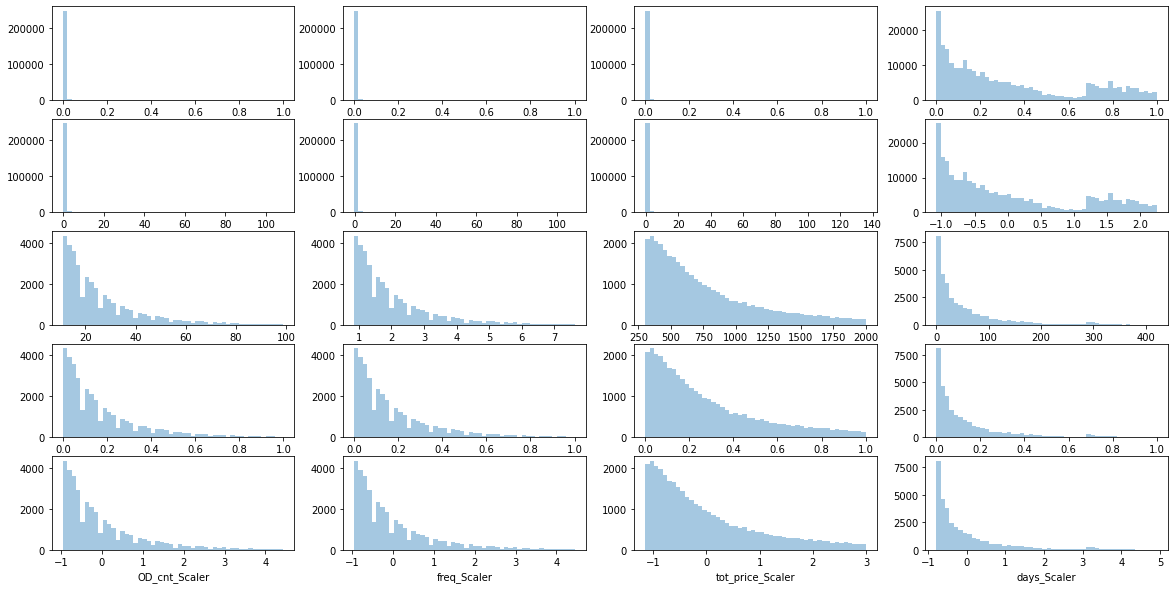

In [24]:
fig,axes=plt.subplots(5,4)
fig.set_size_inches(20,10)
sns.distplot(df_MinMax['OD_cnt_Scaler'],ax=axes[0,0],kde=False)
sns.distplot(df_MinMax['freq_Scaler'],ax=axes[0,1],kde=False) 
sns.distplot(df_MinMax['tot_price_Scaler'],ax=axes[0,2],kde=False) 
sns.distplot(df_MinMax['days_Scaler'],ax=axes[0,3],kde=False) 

sns.distplot(df_Standard['OD_cnt_Scaler'],ax=axes[1,0],kde=False)
sns.distplot(df_Standard['freq_Scaler'],ax=axes[1,1],kde=False) 
sns.distplot(df_Standard['tot_price_Scaler'],ax=axes[1,2],kde=False) 
sns.distplot(df_Standard['days_Scaler'],ax=axes[1,3],kde=False) 

sns.distplot(df_KILLoutlier['OD_cnt'],ax=axes[2,0],kde=False)
sns.distplot(df_KILLoutlier['freq'],ax=axes[2,1],kde=False) 
sns.distplot(df_KILLoutlier['tot_price'],ax=axes[2,2],kde=False) 
sns.distplot(df_KILLoutlier['days'],ax=axes[2,3],kde=False) 

sns.distplot(df_KILLoutlier_MinMax['OD_cnt_Scaler'],ax=axes[3,0],kde=False)
sns.distplot(df_KILLoutlier_MinMax['freq_Scaler'],ax=axes[3,1],kde=False) 
sns.distplot(df_KILLoutlier_MinMax['tot_price_Scaler'],ax=axes[3,2],kde=False) 
sns.distplot(df_KILLoutlier_MinMax['days_Scaler'],ax=axes[3,3],kde=False) 

sns.distplot(df_KILLoutlier_Standard['OD_cnt_Scaler'],ax=axes[4,0],kde=False)
sns.distplot(df_KILLoutlier_Standard['freq_Scaler'],ax=axes[4,1],kde=False) 
sns.distplot(df_KILLoutlier_Standard['tot_price_Scaler'],ax=axes[4,2],kde=False) 
sns.distplot(df_KILLoutlier_Standard['days_Scaler'],ax=axes[4,3],kde=False) 

<function matplotlib.pyplot.show>

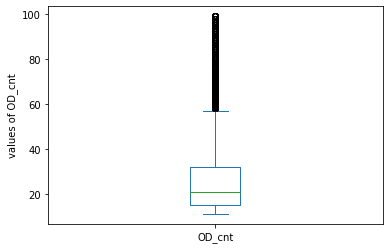

In [25]:
fig,axes = plt.subplots()
df_KILLoutlier['OD_cnt'].plot(kind='box',ax=axes)
axes.set_ylabel('values of OD_cnt')
plt.show

<function matplotlib.pyplot.show>

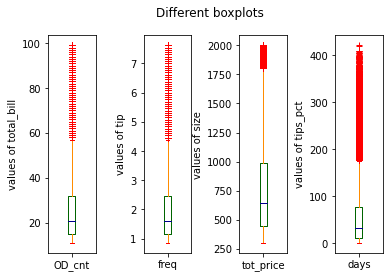

In [26]:
fig,axes = plt.subplots(1,4)
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
              medians='DarkBlue', caps='Red')
# boxes表示箱體，whisker表示觸鬚線
# medians表示中位數，caps表示最大與最小值界限

df_KILLoutlier[['OD_cnt','freq','tot_price','days']].plot(kind='box',ax=axes,subplots=True,title='Different boxplots',color=color,sym='r+')
# sym引數表示異常值標記的方式

axes[0].set_ylabel('values of total_bill')
axes[1].set_ylabel('values of tip')
axes[2].set_ylabel('values of size')
axes[3].set_ylabel('values of tips_pct')

plt.subplots_adjust(wspace=1,hspace=1)  # 調整子圖之間的間距
plt.show

# 找出K值

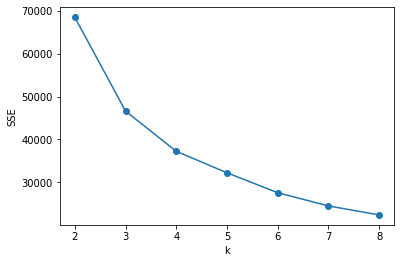

In [ ]:
# 手軸法算k值取多少比較好，基於 SSE（sum of the squared errors，誤差平方和）作為指標，去計算每一個群中的每一個點，到群中心的距離
from sklearn.cluster import KMeans
# '利用SSE选择k'
SSE = []  # 存放每次结果的误差平方和
for k in range(2,9):
    estimator = KMeans(n_clusters=k)  # 构造聚类器
    # estimator.fit(df_KILLoutlier[['OD_cnt','tot_price','days']])
    estimator.fit(df_KILLoutlier_Standard[['OD_cnt_Scaler','tot_price_Scaler','days_Scaler']])
    # estimator.fit(df_Standard[['OD_cnt_Scaler','tot_price_Scaler','days_Scaler']])
    SSE.append(estimator.inertia_) # estimator.inertia_获取聚类准则的总和
X = range(2,9)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()
#經過某點後，線趨於穩定，則該點適合當k值

In [ ]:
# 一直跑不完，奇怪....
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# # 輪廓係數法Silhouette analysis算k值取多少比較好，選值最大
# silhouette_avg = []
# for i in range(2,6):
#     # kmeans_fit = KMeans(n_clusters = i).fit(df_KILLoutlier[['freq','tot_price','days']])
#     # silhouette_avg.append(silhouette_score(df_KILLoutlier[['freq','tot_price','days']], kmeans_fit.labels_))
#     kmeans_fit = KMeans(n_clusters = i).fit(df_Standard[['freq_Scaler','tot_price_Scaler','days_Scaler']])
#     silhouette_avg.append(silhouette_score(df_Standard[['freq_Scaler','tot_price_Scaler','days_Scaler']], kmeans_fit.labels_))

# plt.plot(range(2,6), silhouette_avg)

In [ ]:
# df = pd.concat([df,df_MinMaxScaler],axis=1)

In [ ]:
# df[['OD_cnt','tot_price','days']] = (df[['OD_cnt','tot_price','days']]-df[['OD_cnt','tot_price','days']].mean())/df[['OD_cnt','tot_price','days']].std()

# 模型

In [27]:
from sklearn import cluster, datasets
from sklearn import metrics

def model_k(data,n_clus,name):
  X = data
  # KMeans 演算法
  kmeans_fit = cluster.KMeans(n_clusters = 4).fit(X)
  # 印出分群結果
  cluster_labels = kmeans_fit.labels_
  print("分群結果：")
  print(cluster_labels)
  
  ans = pd.DataFrame(cluster_labels)
  print(ans.iloc[:,0].unique())
  print(ans.iloc[:,0].value_counts())

  # 分群演算法的績效可以使用 Silhouette 係數
  # sklearn.metrics 的 silhouette_score() 方法，這個數值愈接近 1 表示績效愈好，反之愈接近 -1 表示績效愈差
  # 印出績效
  silhouette_avg = metrics.silhouette_score(X, cluster_labels)
  print(silhouette_avg)

  #匯出
  df_final = pd.concat([data, ans], axis = 1)
  df_final.to_csv(f"/content/gdrive/MyDrive/data/{name}_{n_clus}_{round(silhouette_avg,3)}.csv")

In [28]:
model_k(df_KILLoutlier[['OD_cnt','tot_price','days']],4,'Kill') # Kill St MM

分群結果：
[3 0 2 ... 2 3 0]
[3 0 2 1]
0    16017
3    10242
1     5943
2     3637
Name: 0, dtype: int64
0.5021016029060122


# 其它

In [ ]:
# from sklearn import cluster, datasets, metrics
# import matplotlib.pyplot as plt

# # 讀入鳶尾花資料
# iris = datasets.load_iris()
# iris_X = iris.data

# # 迴圈
# silhouette_avgs = []
# ks = range(2, 11)
# for k in ks:
#     kmeans_fit = cluster.KMeans(n_clusters = k).fit(iris_X)
#     cluster_labels = kmeans_fit.labels_
#     silhouette_avg = metrics.silhouette_score(iris_X, cluster_labels)
#     silhouette_avgs.append(silhouette_avg)

# # 作圖並印出 k = 2 到 10 的績效
# plt.bar(ks, silhouette_avgs)
# plt.show()
# print(silhouette_avgs)

In [ ]:
# # 利用make_blobs製造6個群組
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_blobs
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# X, y = make_blobs(n_samples=1000,n_features=2,centers=6,cluster_std=0.3,center_box=(-10.0, 10.0)) 
# plt.scatter(*zip(*X))

# # X, y = make_blobs(n_samples=1000,n_features=2,centers=13,cluster_std=1,center_box=(-10.0, 10.0)) 
# # plt.scatter(*zip(*X),c=y)